                                       CHURN PREDICTION CASE STUDY

1. Data Overview
    1.1  Print no. of rows and columns of the dataset
    1.2  Print all the features as a list
    1.3  Print number of missing values for dataset
    1.4  Print number of unique values for each feature.
2. Data Manipulation
    2.1  Replace empty spaces with NaN in "total charges" column
    2.2  Drop null values from "total charges" column which contains .15% missing data
    2.3  Convert "total charges" to float.
    2.4  Replace "No Internet Service" to No or folowwing columns
         "Online Security","Online Backup","Device Protection","TechSupport","Streaming TV","Streaming Movies"
    2.5  Replace "Senior Citizen" values {1:Yes,0:No}
    2.6  Create a function "def Tenure_lab" to convert tenure to categories as follows.
            <= 12 -> "Tenure_0-12"
            > 12, <24 -> "Tenure_12-24"
            > 24 ,  <=48 -> "Tenure_24-48"
            >48, <=60 -> "Tenure_48-60"
            > 60 -> "Tenure_gt_60"
            
            def Tenure_lab(tenure): -- pass the dataframe columns
                if df['tenure'].value <=20:
                    return "Tenure_0-12"  df['tenure'].value = "Tenure_0-12"
                elseif tenure -gt 12 && tenure  -lt 24:
                    return "Tenure_12-24"
                elseif tenure -gt 24 && tenure <= 48:
                    return "Tenure_24-48"
                elseif tenure -gt 48 && tenure <= 60:
                    return "Tenure_48-60"
                else:
                    return "Tenure_gt-60"
                    
    2.7  Seperate churn and not churn customers into variables churn, not_churn.
    2.8  Seperate categorical and numerical columns into variables cat_cols,cat_num.
3. Exploratory Data Analysis
    Contruct the following functions:
    3.1  def plot_pie(column)
         Description : Using all categorical columns, contruct a pie chart for churn and non churn customers
    3.2  def histogram(column)
         Description : Using all numerical columns, make histogram to compare churn and non churn customers.
    3.3  Create a function called "def scatter_matrix(df)"
         Description : For all numeric columns construct scatterplot which can visualize churn and non churn customer          in one graph.
    3.4  For all different trnure groups build a barplot to visualize churn and non churn customers.
    3.5  Create a scatter plot betwen "Total Charges" and "Monthly Charges" and color code the data points using              tenure groups.
    3.6  Repeat above, color code to churn and not churn.
    3.7  Construct barplot for Total Charges and Monthly Charges seperately with tenure group on x-axis and bar                should be depicting churn and not churn for each customer tenure group.
    3.8  Construct a correlation heatmap for all numerical variables.
4. Data Preprocessing
    4.1  Seperate CustomerID column in ID_col
    4.2  Seperate churn in target_col
    4.3  Seperate categorical columns in cat_cols
    4.4  Seperate numerical columns in num_cols
    4.5  Seperate binary columns with 2 values & store in bin_cols
    4.6  Seperate variables with multiple values and store in multi_cols.
    4.7  Label encode binary columns using LabelEncoder()
    4.8  Dummy encode multi_cols using pandas
    4.9  Scale numeric columns using StandardScalar()
    4.10 Drop Original values and Merge the scaled values with your dataframe.
5. Model Building
    5.1  Build Logistic Regression
    5.2  Build Decision Trees
    5.3  Build Random Forest
    5.4  For each model print accuracy, precision and recall
    5.5  Draw ROC curve for each model
    5.6  Compare model performance
    
    
MAIL TO : loveesh.imarticus@gmail.com
SUBJECT LINE : FirstName_MLP3
FILES : "html","ipynb"

In [1]:
# Import all the libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score, roc_curve, roc_auc_score, confusion_matrix,auc
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.classifier import DiscriminationThreshold
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting for full column selection

pd.set_option('display.max_columns', 999)

In [3]:
# Read the " churn" dataset

df_churn = pd.read_csv('/Users/abhisheksingh/Desktop/MLP/churn.csv', na_filter=False)

In [4]:
# Display top 5 records

df_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [5]:
# Print the number of rows and columns

print('Rows : ', df_churn.shape[0])
print('Columns : ', df_churn.shape[1])

Rows :  7043
Columns :  21


In [6]:
# Print all the features as a list

df_churn.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
# Replace empty spaces with Nan

df = df_churn.replace(' ',np.NaN)

In [8]:
#  Getting the null values in a variable

missing_data = df.isnull()

In [9]:
# Printing the value counts for all the columns

for column in missing_data.columns.values.tolist(): # Convert into list to iterate through columns
    print(column)
    print(missing_data[column].value_counts())  # Count True and False column wise
    
    print("")

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

In [10]:
# Describe the data which includes Unique values for each feature(Categorical) 

print ("\nUnique values :  \n",df.nunique())


Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [11]:
# Drop entire ros with null values

df.dropna(axis=0, inplace=True)

In [12]:
# Check the missing value counts 

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Convert the datatype of "TotalCharges" column to "float".

df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [14]:
# Check the datatype of the Column "TotalCharges"

df['TotalCharges'].dtype

dtype('float32')

In [15]:
#Replace "No Internet Service" to No or following columns
 #        "Online Security","Online Backup","Device Protection","TechSupport","Streaming TV","Streaming Movies"

cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df[cols]=df[cols].replace('No internet service','No')

In [16]:
df = df.reset_index()[df.columns]

In [17]:
# Double check for one column

df['OnlineSecurity'].value_counts()

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

In [18]:
# Replace "Senior Citizen" values {1:Yes,0:No}

df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [19]:
# Check the "Senior Citizen" column values

df['SeniorCitizen'].value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [20]:
# Create a function "def Tenure_lab" to convert tenure to categories.

def Tenure_lab(df) :
    
    if df['tenure'] <= 12 :
        return "Tenure_0-12"
    elif (df['tenure'] > 12) & (df['tenure'] <= 24 ):
        return "Tenure_12-24"
    elif (df['tenure'] > 24) & (df['tenure'] <= 48):
        return "Tenure_24-48"
    elif (df['tenure'] > 48) & (df['tenure'] <= 60):
        return "Tenure_48-60"
    elif df['tenure'] > 60:
        return "Tenure_gt-60"

In [21]:
# Call the above function

df['tenure_cat'] = df.apply(lambda df:Tenure_lab(df),axis = 1)

In [22]:
# Check the unique values in the newly created columns

df['tenure_cat'].unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt-60',
       'Tenure_48-60'], dtype=object)

In [23]:
# Seperate churn and not churn customers into variables churn, not_churn

churn     = df[df['Churn'] == "Yes"]
not_churn = df[df['Churn'] == "No"]

In [24]:
churn.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
2   3668-QPYBK    Male            No      No         No       2          Yes   
4   9237-HQITU  Female            No      No         No       2          Yes   
5   9305-CDSKC  Female            No      No         No       8          Yes   
8   7892-POOKP  Female            No     Yes         No      28          Yes   
13  0280-XJGEX    Male            No      No         No      49          Yes   

   MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
2             No             DSL            Yes          Yes               No   
4             No     Fiber optic             No           No               No   
5            Yes     Fiber optic             No           No              Yes   
8            Yes     Fiber optic             No           No              Yes   
13           Yes     Fiber optic             No          Yes              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
2           No          No              No  Month-to-month              Yes   
4           No          No              No  Month-to-month              Yes   
5           No         Yes             Yes  Month-to-month              Yes   
8          Yes         Yes             Yes  Month-to-month              Yes   
13          No         Yes             Yes  Month-to-month              Yes   

                PaymentMethod  MonthlyCharges  TotalCharges Churn  \
2                Mailed check           53.85    108.150002   Yes   
4            Electronic check           70.70    151.649994   Yes   
5            Electronic check           99.65    820.500000   Yes   
8            Electronic check          104.80   3046.050049   Yes   
13  Bank transfer (automatic)          103.70   5036.299805   Yes   

      tenure_cat  
2    Tenure_0-12  
4    Tenure_0-12  
5    Tenure_0-12  
8   Tenure_24-48  
13  Tenure_48-60

In [25]:
not_churn.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
6  1452-KIOVK    Male            No      No        Yes      22          Yes   
7  6713-OKOMC  Female            No      No         No      10           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
3  No phone service             DSL            Yes           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
3              Yes         Yes          No              No        One year   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85     29.850000   
1               No               Mailed check           56.95   1889.500000   
3               No  Bank transfer (automatic)           42.30   1840.750000   
6              Yes    Credit card (automatic)           89.10   1949.400024   
7               No               Mailed check           29.75    301.899994   

  Churn    tenure_cat  
0    No   Tenure_0-12  
1    No  Tenure_24-48  
3    No  Tenure_24-48  
6    No  Tenure_12-24  
7    No   Tenure_0-12

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float32
Churn               7032 non-null object
tenure_cat          7032 non-nu

In [27]:
# Seperate categorical and numerical columns into variables at_cols,cat_num

Id_col = 'customerID'
target_col = 'Churn'
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [cols for cols in cat_cols if cols not in target_col]

num_cols   = df.select_dtypes(exclude=['object']).columns.tolist()

In [28]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_cat']

In [29]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [30]:
# Exploratory Data Analysis
    
#Contruct the following functions:

In [31]:
# def plot_pie(column)
#Description : Using all categorical columns, contruct a pie chart for churn and non churn customers

In [32]:
#?go.Layout

In [33]:
#?go.Pie

In [34]:
def plot_pie(column):
    Pie1=go.Pie(labels=churn[column].value_counts().keys().tolist(),
                values=churn[column].value_counts().values.tolist(),
                name    = "Churn Customers",
                domain  = dict(x = [0,.48]),
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),hole=.4)
    Pie2=go.Pie(labels=not_churn[column].value_counts().keys().tolist(),
                values=not_churn[column].value_counts().values.tolist(),
                name    = "Not Churn Customers",
                domain  = dict(x = [.52,1]),
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),hole=.4)

    
    layout = go.Layout(dict(title = column,
                            plot_bgcolor  = "rgb(200,200,200)",
                            paper_bgcolor = "rgb(250,250,250)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 10),
                                               showarrow = False,
                                                x = .18, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 10),
                                               showarrow = False,
                                                x = .83,y = .5
                                        
                                               )
                                          ]
                           )
                      )

    fig = go.Figure(data = [Pie1,Pie2], layout = layout)
    py.iplot(fig)
for i in [x for x in cat_cols if x!='customerID']:
    plot_pie(i)

In [35]:
#?go.Histogram

In [36]:
# def histogram(column)
# Description : Using all numerical columns, make histogram to compare churn and non churn customers.

def histogram(column) :
    hist1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                         opacity = .8 
                         ) 
    
    hist2 = go.Histogram(x  = not_churn[column],
                          histnorm= "percent",
                          name = "Non Churn Customers",
                         opacity = .8 
                         ) 
    
    layout = go.Layout(dict(title =column,
                            plot_bgcolor  = "rgb(200,200,200)",
                            paper_bgcolor = "rgb(250,250,250)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                            ),
                           )
                      )
    fig  = go.Figure(data=[hist1,hist2],layout=layout)
    
    py.iplot(fig)
    
for i in num_cols:
    histogram(i)

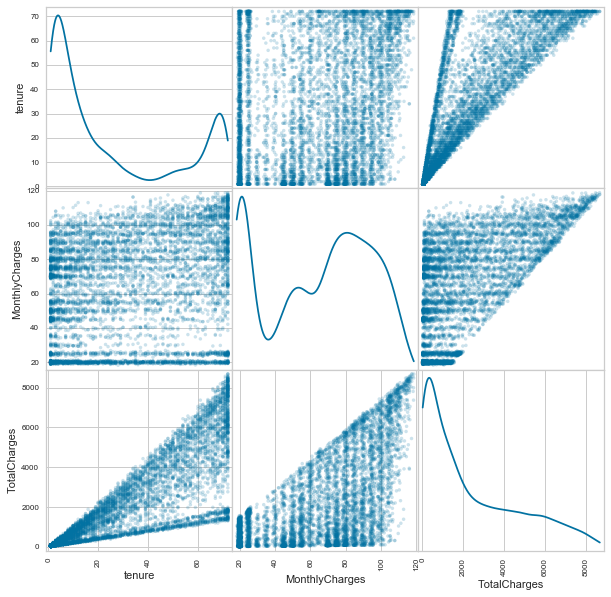

In [37]:
# Create a function called "def scatter_matrix(df)"
# Description : For all numeric columns construct scatterplot which can visualize churn and 
# non churn customer in one graph.

pd.plotting.scatter_matrix(df[num_cols], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

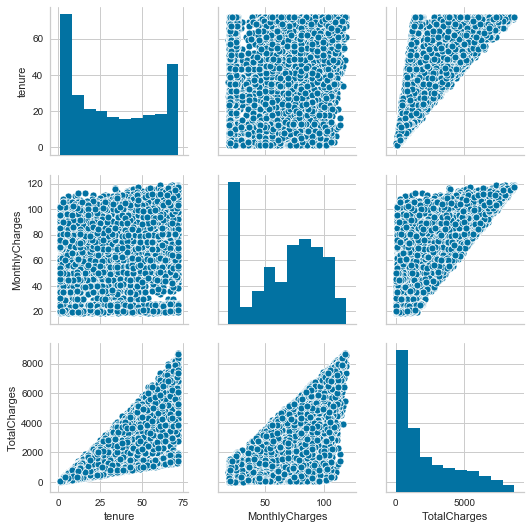

In [38]:
sns.pairplot(df[num_cols])
plt.show()

In [39]:
# For all different tenure groups build a barplot to visualize churn and non churn customers.

bar_ch  =  churn['tenure_cat'].value_counts().reset_index()
bar_ch.columns  = ['tenure_cat','count']

bar_nt_ch  =  not_churn['tenure_cat'].value_counts().reset_index()
bar_nt_ch.columns  = ['tenure_cat','count']

In [40]:
bar_ch

tenure_cat  count
0   Tenure_0-12   1037
1  Tenure_24-48    325
2  Tenure_12-24    294
3  Tenure_48-60    120
4  Tenure_gt-60     93

In [41]:
bar_ch.columns

Index(['tenure_cat', 'count'], dtype='object')

In [42]:
#bar - churn
bar1 = go.Bar(x = bar_ch['tenure_cat']  , y = bar_ch['count'],
                name = 'Churn Customers',
                opacity = .9)

#bar - not churn
bar2 = go.Bar(x = bar_nt_ch['tenure_cat'] , y = bar_nt_ch['count'],
                name = 'Non Churn Customers',
                opacity = .9)

layout = go.Layout(dict(title = "Churn in tenure groups",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'Tenure Category'),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'count'),
                       )
                  )
                        

fig  = go.Figure(data=[bar1,bar2],layout=layout)
py.iplot(fig)

In [43]:
#?sns.scatterplot

In [44]:
#ax = sns.scatterplot(x=churn['tenure_cat'], y=df[num_cols])

In [45]:
# Create a scatter plot betwen "Total Charges" and "Monthly Charges" and color code 
# the data points using tenure categories.

df[['MonthlyCharges', 'TotalCharges','tenure',"tenure_cat"]]

# Scatter plot monthly charges & total charges by tenure categories
scatter1 = []
scatter_plot = {'Tenure_0-12' : 'red', 'Tenure_12-24': 'green','Tenure_24-48':'purple',
                'Tenure_48-60':'yellow','Tenure_gt-60':'black'}
for keys,values in scatter_plot.items():
     scatter1.append(go.Scatter(x = df[df['tenure_cat'] == keys]['MonthlyCharges'],
                        y = df[df['tenure_cat'] == keys]['TotalCharges'],
                                          mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = values,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = keys
                                          ,
                        opacity = .9
                       ))

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         ),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges & Total Charges by Tenure Categories")
fig1 = go.Figure(data = scatter1,layout = layout1)
py.iplot(fig1)


In [46]:
df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7027  6840-RESVB    Male            No     Yes        Yes      24   
7028  2234-XADUH  Female            No     Yes        Yes      72   
7029  4801-JZAZL  Female            No     Yes        Yes      11   
7030  8361-LTMKD    Male           Yes     Yes         No       4   
7031  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7027          Yes               Yes             DSL            Yes   
7028          Yes               Yes     Fiber optic             No   
7029           No  No phone service             DSL            Yes   
7030          Yes               Yes     Fiber optic             No   
7031          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7027           No              Yes         Yes         Yes             Yes   
7028          Yes              Yes          No         Yes             Yes   
7029           No               No          No          No              No   
7030           No               No          No          No              No   
7031           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7027        One year              Yes               Mailed check   
7028        One year              Yes    Credit card (automatic)   
7029  Month-to-month              Yes           Electronic check   
7030  Month-to-month              Yes               Mailed check   
7031        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn    tenure_cat  
0              29.85     29.850000    No   Tenure_0-12  
1              56.95   1889.500000    No  Tenure_24-48  
2              53.85    108.150002   Yes   Tenure_0-12  
3              42.30   1840.750000    No  Tenure_24-48  
4              70.70    151.649994   Yes   Tenure_0-12  
...              ...           ...   ...           ...  
7027           84.80   1990.500000    No  Tenure_12-24  
7028          103.20   7362.899902    No  Tenure_gt-60  
7029           29.60    346.450012    No   Tenure_0-12  
7030        

In [47]:
# Repeat above, color code to churn and not churn.

churn1=[]
churn_plot={'Yes':'red', 'No':'blue'}
for keys,values in churn_plot.items():
    churn1.append(go.Scatter(x = df[df['Churn'] == keys]['MonthlyCharges'],
                        y = df[df['Churn'] == keys]['TotalCharges'],
                        mode = 'markers',marker = dict(line = dict(color = 'black',
                                                                   width = .2),
                                                       size = 4 , color = values,
                                                       symbol = 'diamond-dot',
                                                      ),
                        name = 'Churn - ' + keys,
                        opacity = .9
                       ))

layout2  = layout_title("Monthly Charges & Total Charges by Churn and not churn")
fig2 = go.Figure(data = churn1,layout = layout2)
py.iplot(fig2)

In [48]:
# Construct barplot for Total Charges and Monthly Charges seperately with tenure group 
# on x-axis and bar should be depicting churn and not churn for each customer tenure group.

In [49]:
tenure_category = df[['tenure_cat','Churn','MonthlyCharges','TotalCharges']]
tenure_category[tenure_category['Churn']=='Yes']['tenure_cat']

2        Tenure_0-12
4        Tenure_0-12
5        Tenure_0-12
8       Tenure_24-48
13      Tenure_48-60
            ...     
7010     Tenure_0-12
7015     Tenure_0-12
7021     Tenure_0-12
7023    Tenure_gt-60
7030     Tenure_0-12
Name: tenure_cat, Length: 1869, dtype: object

In [50]:
tenure_category = df[['tenure_cat','Churn','MonthlyCharges','TotalCharges']]
churn_cat = {'Yes':'red','No':'blue'}
column = df[['MonthlyCharges','TotalCharges']].columns.to_list()
barplot1_M = []
barplot1_T = []

for i,j in churn_cat.items():
    barplot1_M.append(go.Bar(x = tenure_category.loc[tenure_category['Churn'] == i]['tenure_cat'],
                    y = tenure_category.loc[tenure_category['Churn'] == i][column[0]],
                            name=i, marker = dict(line = dict(width = 1,color=j))))
    barplot1_T.append(go.Bar(x = tenure_category.loc[tenure_category['Churn'] == i]['tenure_cat'],
                    y = tenure_category.loc[tenure_category['Churn'] == i][column[1]],
                             name=i,marker = dict(line = dict(width = 1,color=j))
                   
                   ))
    

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout



layout1 = layout_plot('Monthly Charges by Tenure Category',
                      'Tenure Category','Monthly Charges')
fig1    = go.Figure(data=barplot1_M,layout=layout1)

layout2 = layout_plot('Total Charges by Tenure Category',
                      'Tenure Category','Total Charges')
fig2    = go.Figure(data=barplot1_T,layout=layout2)

py.iplot(fig1)
py.iplot(fig2)

In [51]:
cols = df[num_cols].corr().columns.to_list()
cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [52]:
# Construct a correlation heatmap for all numerical variables

cols = df[num_cols].corr().columns.to_list()

corr_array  = np.array(df[num_cols].corr())

#Plotting
heat_map = go.Heatmap(z = corr_array,
                   x = cols,
                   y = cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Correlation",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for Numeric variables",
                        autosize = False,
                        height  = 720,
                        width   = 800
                       )
                  )


fig = go.Figure(data=heat_map,layout=layout)
py.iplot(fig)

In [53]:
# Data Preprocessing

In [54]:
# Seperate CustomerID column in ID_col
Id_col

'customerID'

In [55]:
# Seperate churn in target_col

target_col

'Churn'

In [56]:
# Seperate categorical columns in cat_cols

cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_cat']

In [57]:
# Seperate numerical columns in num_cols

num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [58]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_cat             5
dtype: int64

In [59]:
# Seperate binary columns with 2 values & store in bin_cols

#df.nunique()
bin_cols = df.nunique()[df.nunique()==2].keys().to_list()

In [60]:
# Seperate variables with multiple values and store in multi_cols
col_req = [x for x in df.columns if x!='customerID']
multi_cols = df[col_req].nunique()[df[col_req].nunique()>2].keys().to_list()

In [61]:
multi_cols

['tenure',
 'MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'tenure_cat']

In [62]:
df[multi_cols]

tenure     MultipleLines InternetService        Contract  \
0          1  No phone service             DSL  Month-to-month   
1         34                No             DSL        One year   
2          2                No             DSL  Month-to-month   
3         45  No phone service             DSL        One year   
4          2                No     Fiber optic  Month-to-month   
...      ...               ...             ...             ...   
7027      24               Yes             DSL        One year   
7028      72               Yes     Fiber optic        One year   
7029      11  No phone service             DSL  Month-to-month   
7030       4               Yes     Fiber optic  Month-to-month   
7031      66                No     Fiber optic        Two year   

                  PaymentMethod  MonthlyCharges  TotalCharges    tenure_cat  
0              Electronic check           29.85     29.850000   Tenure_0-12  
1                  Mailed check           56.95   1889.500000  Tenure_24-48  
2                  Mailed check           53.85    108.150002   Tenure_0-12  
3     Bank transfer (automatic)           42.30   1840.750000  Tenure_24-48  
4              Electronic check           70.70    151.649994   Tenure_0-12  
...                         ...             ...           ...           ...  
7027               Mailed check           84.80   1990.500000  Tenure_12-24  
7028    Credit card (automatic)          103.20   7362.899902  Tenure_gt-60  
7029           Electronic check           29.60    346.450012   Tenure_0-12  
7030               Mailed check           74.40    306.600006   Tenure_0-12  
7031  Bank transfer (automatic)          105.65   6844.500000  Tenure_gt-60  

[7032 rows x 8 columns]

In [63]:
# Label encode binary columns using LabelEncoder()

bin_col1  = df[bin_cols].apply(LabelEncoder().fit_transform)

In [64]:
bin_col1

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0          0              0        1           0             0   
1          1              0        0           0             1   
2          1              0        0           0             1   
3          1              0        0           0             0   
4          0              0        0           0             1   
...      ...            ...      ...         ...           ...   
7027       1              0        1           1             1   
7028       0              0        1           1             1   
7029       0              0        1           1             0   
7030       1              1        1           0             1   
7031       1              0        0           0             1   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0                  0             1                 0            0   
1                  1             0                 1            0   
2                  1             1                 0            0   
3                  1             0                 1            1   
4                  0             0                 0            0   
...              ...           ...               ...          ...   
7027               1             0                 1            1   
7028               0             1                 1            0   
7029               1             0                 0            0   
7030               0             0                 0            0   
7031               1             0                 1            1   

      StreamingTV  StreamingMovies  PaperlessBilling  Churn  
0               0                0                 1      0  
1               0                0                 0      0  
2               0                0                 1      1  
3               0                0                 0      0  
4               0                0                 1      1  
...           ...              ...               ...    ...  
7027            1                1                 1      0  
7028            1                1                 1      0  
7029            0                0                 1      0  
7030            0                0                 1      1  
7031            1                1                 1      0  

[7032 rows x 13 columns]

In [65]:
# Dummy encode multi_cols using pandas

df_1 = pd.get_dummies(df[multi_cols])

In [66]:
bin_col1

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0          0              0        1           0             0   
1          1              0        0           0             1   
2          1              0        0           0             1   
3          1              0        0           0             0   
4          0              0        0           0             1   
...      ...            ...      ...         ...           ...   
7027       1              0        1           1             1   
7028       0              0        1           1             1   
7029       0              0        1           1             0   
7030       1              1        1           0             1   
7031       1              0        0           0             1   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0                  0             1                 0            0   
1                  1             0                 1            0   
2                  1             1                 0            0   
3                  1             0                 1            1   
4                  0             0                 0            0   
...              ...           ...               ...          ...   
7027               1             0                 1            1   
7028               0             1                 1            0   
7029               1             0                 0            0   
7030               0             0                 0            0   
7031               1             0                 1            1   

      StreamingTV  StreamingMovies  PaperlessBilling  Churn  
0               0                0                 1      0  
1               0                0                 0      0  
2               0                0                 1      1  
3               0                0                 0      0  
4               0                0                 1      1  
...           ...              ...               ...    ...  
7027            1                1                 1      0  
7028            1                1                 1      0  
7029            0                0                 1      0  
7030            0                0                 1      1  
7031            1                1                 1      0  

[7032 rows x 13 columns]

In [67]:
df_1

tenure  MonthlyCharges  TotalCharges  MultipleLines_No  \
0          1           29.85     29.850000                 0   
1         34           56.95   1889.500000                 1   
2          2           53.85    108.150002                 1   
3         45           42.30   1840.750000                 0   
4          2           70.70    151.649994                 1   
...      ...             ...           ...               ...   
7027      24           84.80   1990.500000                 0   
7028      72          103.20   7362.899902                 0   
7029      11           29.60    346.450012                 0   
7030       4           74.40    306.600006                 0   
7031      66          105.65   6844.500000                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                  1                  0                    1   
1                                  0                  0                    1   
2                                  0                  0                    1   
3                                  1                  0                    1   
4                                  0                  0                    0   
...                              ...                ...                  ...   
7027                               0                  1                    1   
7028                               0                  1                    0   
7029                               1                  0                    1   
7030                               0                  1                    0   
7031                               0                  0                    0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7027                        0                  1                  0   
7028                        0                  1                  0   
7029                        1                  0                  0   
7030                        1                  0                  0   
7031                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                           

In [68]:
df_1 = pd.concat([df_1, bin_col1], axis=1)

In [69]:
df_1

tenure  MonthlyCharges  TotalCharges  MultipleLines_No  \
0          1           29.85     29.850000                 0   
1         34           56.95   1889.500000                 1   
2          2           53.85    108.150002                 1   
3         45           42.30   1840.750000                 0   
4          2           70.70    151.649994                 1   
...      ...             ...           ...               ...   
7027      24           84.80   1990.500000                 0   
7028      72          103.20   7362.899902                 0   
7029      11           29.60    346.450012                 0   
7030       4           74.40    306.600006                 0   
7031      66          105.65   6844.500000                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                  1                  0                    1   
1                                  0                  0                    1   
2                                  0                  0                    1   
3                                  1                  0                    1   
4                                  0                  0                    0   
...                              ...                ...                  ...   
7027                               0                  1                    1   
7028                               0                  1                    0   
7029                               1                  0                    1   
7030                               0                  1                    0   
7031                               0                  0                    0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7027                        0                  1                  0   
7028                        0                  1                  0   
7029                        1                  0                  0   
7030                        1                  0                  0   
7031                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                           

In [70]:
# Scale numeric columns using StandardScalar()

scalar = StandardScaler().fit_transform(df[num_cols])

In [71]:
scalar

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451413],
       [-1.15801615,  0.31916782, -0.87209545],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [72]:
df_num = df[df.select_dtypes(exclude=['object']).keys()]

In [73]:
df_num.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [74]:
df_num = pd.DataFrame(StandardScaler().fit_transform(df_num))
#df = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)


In [75]:
df_num.rename(columns={0:'tenure_1',1:'MonthlyCharges_1',2:'TotalCharges_1'}, inplace=True)
#df.rename(columns={"A": "a", "B": "c"})

In [76]:
df_num

tenure_1  MonthlyCharges_1  TotalCharges_1
0    -1.280248         -1.161694       -0.994194
1     0.064303         -0.260878       -0.173740
2    -1.239504         -0.363923       -0.959649
3     0.512486         -0.747850       -0.195248
4    -1.239504          0.196178       -0.940457
...        ...               ...             ...
7027 -0.343137          0.664868       -0.129180
7028  1.612573          1.276493        2.241056
7029 -0.872808         -1.170004       -0.854514
7030 -1.158016          0.319168       -0.872095
7031  1.368109          1.357932        2.012344

[7032 rows x 3 columns]

In [77]:
# Drop Original values and Merge the scaled values with your dataframe.

df_final = pd.concat([df_1,df_num],axis=1)

In [78]:
df_final

tenure  MonthlyCharges  TotalCharges  MultipleLines_No  \
0          1           29.85     29.850000                 0   
1         34           56.95   1889.500000                 1   
2          2           53.85    108.150002                 1   
3         45           42.30   1840.750000                 0   
4          2           70.70    151.649994                 1   
...      ...             ...           ...               ...   
7027      24           84.80   1990.500000                 0   
7028      72          103.20   7362.899902                 0   
7029      11           29.60    346.450012                 0   
7030       4           74.40    306.600006                 0   
7031      66          105.65   6844.500000                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                  1                  0                    1   
1                                  0                  0                    1   
2                                  0                  0                    1   
3                                  1                  0                    1   
4                                  0                  0                    0   
...                              ...                ...                  ...   
7027                               0                  1                    1   
7028                               0                  1                    0   
7029                               1                  0                    1   
7030                               0                  1                    0   
7031                               0                  0                    0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7027                            0                   0   
7028                            1                   0   
7029                            0                   0   
7030                            1                   0   
7031                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7027                        0                  1                  0   
7028                        0                  1                  0   
7029                        1                  0                  0   
7030                        1                  0                  0   
7031                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                           

In [79]:
df_final.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1, inplace=True)

In [80]:
df_final

MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7027                 0                               0                  1   
7028                 0                               0                  1   
7029                 0                               1                  0   
7030                 0                               0                  1   
7031                 1                               0                  0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7027                    1                            0                   0   
7028                    0                            1                   0   
7029                    1                            0                   0   
7030                    0                            1                   0   
7031                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7027                        0                  1                  0   
7028                        0                  1                  0   
7029                        1                  0                  0   
7030                        1                  0                  0   
7031                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7027                                      0                               0   
7028                                      1                           

In [96]:
# Model Building

train,test = train_test_split(df_final,test_size = .25 ,random_state = 111)

cols    = [i for i in df_final.columns if i not in Id_col + target_col]
X_train = train[cols]
y_train = train[target_col]
X_test  = test[cols]
y_test  = test[target_col]

In [107]:
X_train.shape

(5274, 33)

In [100]:
y_train.shape

(5274,)

In [114]:
X_test.shape

(1758, 33)

In [115]:
y_test.shape

(1758,)

In [101]:
churn_y = df_final[df_final['Churn']==1]

churn_n = df_final[df_final['Churn']==0]

In [102]:
churn_y.shape

(1869, 34)

In [103]:
churn_n.shape

(5163, 34)

In [119]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(ratio=0.5)

X_train_res, y_train_res = os.fit_sample(X_train, y_train)

In [120]:
X_train_res.shape

(5842, 33)

In [121]:
y_train_res.shape

(5842,)

In [116]:
def churn_prediction(algorithm,x_train,x_test,y_train,y_test,cols,threshold_plot) :
    
    # Model
    algorithm.fit(x_train,y_train)
    # Prediction
    predictions   = algorithm.predict(x_test)
    # Confusion matrix
    confusion_mat = confusion_matrix(y_test,predictions)
    # Probabilities
    probabilities = algorithm.predict_proba(x_test)
    
    print(algorithm)
    print ("\n Classification report : \n",classification_report(y_test,predictions))
    print ("Accuracy   Score : ",accuracy_score(y_test,predictions))
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    #print('fpr : ', fpr,'\n')
    #print('tpr : ', tpr,'\n')
    #print('thresholds : ', thresholds,'\n')
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(x_train,y_train)
        visualizer.poof()
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
      
    if algorithm == 'randomForest':
        print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(X_test, y_test)))
        # Utility function to report the test scores

In [117]:
def report(results, n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank : {0}".format(i))
            print("Mean validation score : {0:.3f}(std: {1:.3f})".format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


Running Logitic Regression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1268
           1       0.63      0.62      0.63       490

    accuracy                           0.79      1758
   macro avg       0.74      0.74      0.74      1758
weighted avg       0.79      0.79      0.79      1758

Accuracy   Score :  0.7946530147895335
Area under curve :  0.741197772484388 



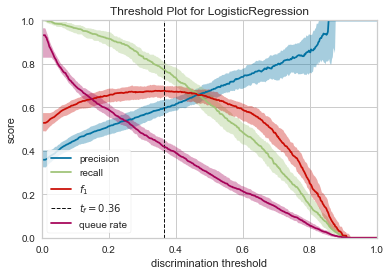

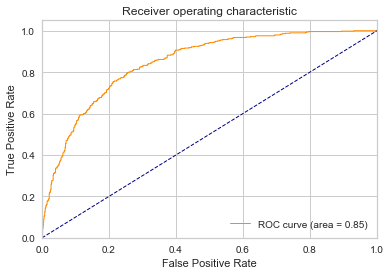


 Logistixc Regression Finished


 Running Decision Tree Unpruned

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1268
           1       0.52      0.49      0.50       490

    accuracy                           0.73      1758
   macro avg       0.66      0.65      0.66      1758
weighted avg       0.73      0.73      0.73      1758

Accuracy   Score :  0.729806598407281
Area under curve :  0.6549233889139252 



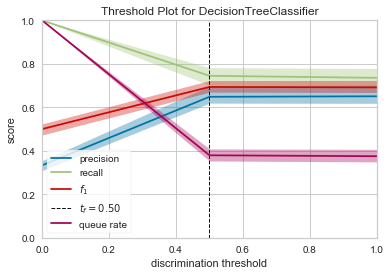

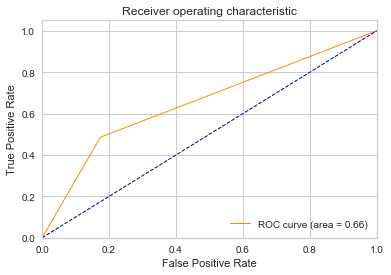


Running Desicion Tree Pruned

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1268
           1       0.62      0.67      0.64       490

    accuracy                           0.79      1758
   macro avg       0.74      0.75      0.75      1758
weighted avg       0.80      0.79      0.79      1758

Accuracy   Score :  0.7906712172923777
Area under curve :  0.7522114208459408 



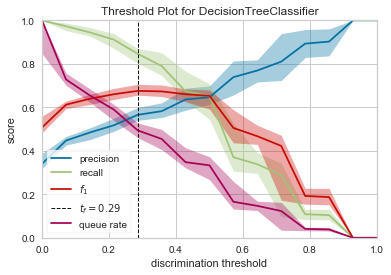

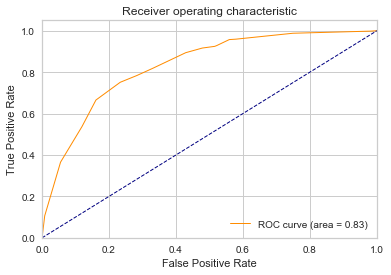


 Decision Tree Finished


 Running Random Forest 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.85      1268
           1       0.61      0.43      0.50       490

    accuracy                           0.76      1758
   macro avg       0.71      0.66      0.67      1758
weighted avg       0.75      0.76      0.75      1758

Accuracy   Score :  0.7639362912400455
Area under curve :  0.6610522757999099 



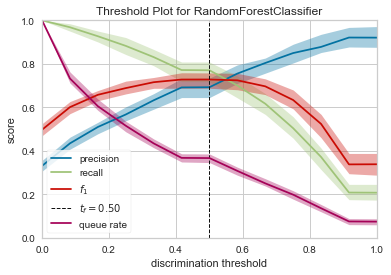

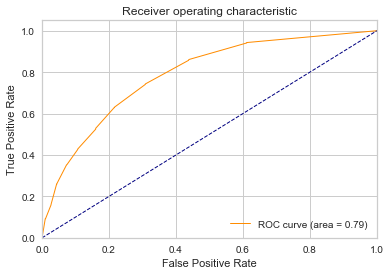


Random Forest Finished



In [122]:
print('\nRunning Logitic Regression \n')

logistic = LogisticRegression()
churn_prediction(logistic,X_train_res,X_test,y_train_res,y_test,cols,threshold_plot = True)
print('\n Logistixc Regression Finished\n')


print('\n Running Decision Tree Unpruned\n')
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = DecisionTreeClassifier()
decisionTree = DecisionTreeClassifier(max_depth = 4)

# Fit each tree to our training data
churn_prediction(decisionTree_unpruned, X_train_res,X_test,y_train_res,y_test,cols,threshold_plot=True)
#decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
print('\nRunning Desicion Tree Pruned\n')
churn_prediction(decisionTree, X_train_res,X_test,y_train_res, y_test,cols,threshold_plot=True)
#decisionTree = decisionTree.fit(X=train_x, y=train_y)

print('\n Decision Tree Finished\n')

print('\n Running Random Forest \n')

randomForest = RandomForestClassifier()
churn_prediction(randomForest,X_train_res,X_test,y_train_res, y_test,cols,threshold_plot=True)
#randomForest.fit(train_x, train_y)

print('\nRandom Forest Finished\n')

In [123]:
#Specify parameters and distributions to sample from
param_dist = {'max_depth': [3,None],
'max_features' : sp_randint(1,11),
'min_samples_split' : sp_randint(2,11),
'bootstrap' :  [True, False],
'criterion' : ['gini','entropy']}

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(randomForest, param_distributions=param_dist,n_iter=n_iter_search, cv=5)
start = time()
random_search.fit(X_train, y_train)
print("Randomized Search took %.2f seconds for %d candidates " "parameter settings." % ((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized Search took 3.52 seconds for 20 candidates parameter settings.
Model with rank : 1
Mean validation score : 0.791(std: 0.010)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 10}

Model with rank : 2
Mean validation score : 0.790(std: 0.009)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 8}

Model with rank : 3
Mean validation score : 0.789(std: 0.009)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 8}



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1268
           1       0.61      0.54      0.58       490

    accuracy                           0.78      1758
   macro avg       0.72      0.71      0.71      1758
weighted avg       0.77      0.78      0.77      1758

Accuracy   Score :  0.7770193401592719
Area under curve :  0.7058086010429407 



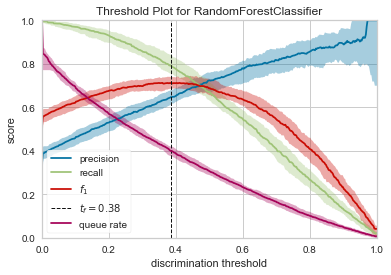

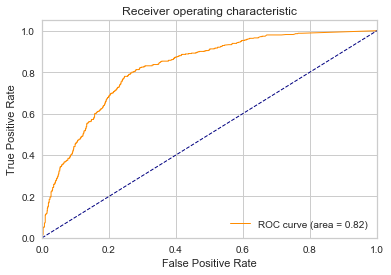

In [124]:
# We take the first one "Model with rank : 1" and check if the model has better performance

random_rf = RandomForestClassifier(bootstrap= True, 
                                   criterion='entropy',  
                                   max_features= 7, min_samples_split= 10)
churn_prediction(random_rf, X_train_res, X_test,y_train_res,y_test,cols,threshold_plot=True)

In [125]:
# Now we apply Grid Search

# Now use a full grid oerall parameters
param_grid = {"max_depth": [3, None],
             "max_features": [1,3,10],
             "min_samples_split":[2,3,10],
             "bootstrap":[True, False],
             "criterion":["gini","entropy"]}

# Run grid search
grid_search = GridSearchCV(random_rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("Grid Searchtook %.2f seconds for %d candidate parameter settings" % (time()-start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


Grid Searchtook 14.85 seconds for 72 candidate parameter settings
Model with rank : 1
Mean validation score : 0.796(std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank : 2
Mean validation score : 0.796(std: 0.009)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank : 3
Mean validation score : 0.796(std: 0.014)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_split': 10}



RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1268
           1       0.62      0.52      0.56       490

    accuracy                           0.78      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.77      0.78      0.77      1758

Accuracy   Score :  0.7758816837315131
Area under curve :  0.6975069207493724 



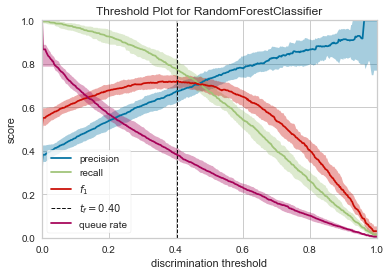

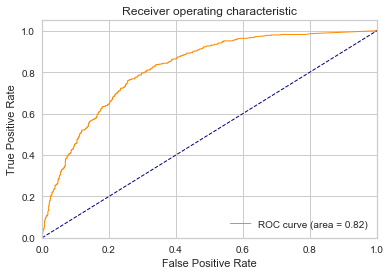

In [126]:
# We take the second one "Model with rank : 1". As the Mean validation score is
# same for all so we pick the with the less Standard Deviation.

random_gs = RandomForestClassifier(bootstrap= False, criterion= 'gini',
                                   max_features=3, min_samples_split=10)

churn_prediction(random_gs,X_train_res,X_test, y_train_res,y_test,cols, threshold_plot=True)

In [89]:
# As we can see that the accuracy for the logistic regression is the highest, i.e. 80%
# But if we see there is a problem of class imbalance

df_final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [127]:
# Calculate the model performance of each model.

from sklearn.metrics import f1_score

#gives model report in dataframe
def model_report(model,X_res,X_test,y_res,y_test,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    
    
    df_model_perf = pd.DataFrame({'Model'           : [name],
                                  'Accuracy_score'  : [accuracy],
                                  'Recall_score'    : [recallscore],
                                  'Precision'       : [precision],
                                  'f1_score'        : [f1score],
                                  'Area_under_curve': [roc_auc],
                               })
    return df_model_perf

#outputs for every model
model1 = model_report(logistic,X_res,X_test,y_res,y_test,
                      "Logistic Regression")
model2 = model_report(decisionTree_unpruned,X_res,X_test,y_res,y_test,
                      "Decision Tree Unpruned")
model3 = model_report(decisionTree_unpruned,X_res,X_test,y_res,y_test,
                      "Decision Tree Pruned")
model4 = model_report(randomForest,X_res,X_test,y_res,y_test,
                      "Random Forest Classifier")
model5 = model_report(random_rf,X_res,X_test,y_res,y_test,
                      "Random Forest Using<br>RandomizedSearchCV")
model6 = model_report(random_gs,X_res,X_test,y_res,y_test,
                      "Random Forest Usnig<br>GridSearchCV")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)